In [1]:
!pip install scikit-learn

In [110]:
# import dependencies 
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import nan as NAN
%matplotlib inline

In [45]:
# Load the Boston Housing Data Set and Transform the data set into data frame
import csv
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'Price']
Housing_pricing = pd.read_csv("C:/Users/11492/Desktop/CS 521/Housing Price Project/housing.csv",delim_whitespace=True, names=column_names)
print(Housing_pricing)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  Price  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.

In [5]:
Housing_pricing.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [6]:
# Correlation between features
corr = Housing_pricing.corr()
corr.shape

(14, 14)

<AxesSubplot:>

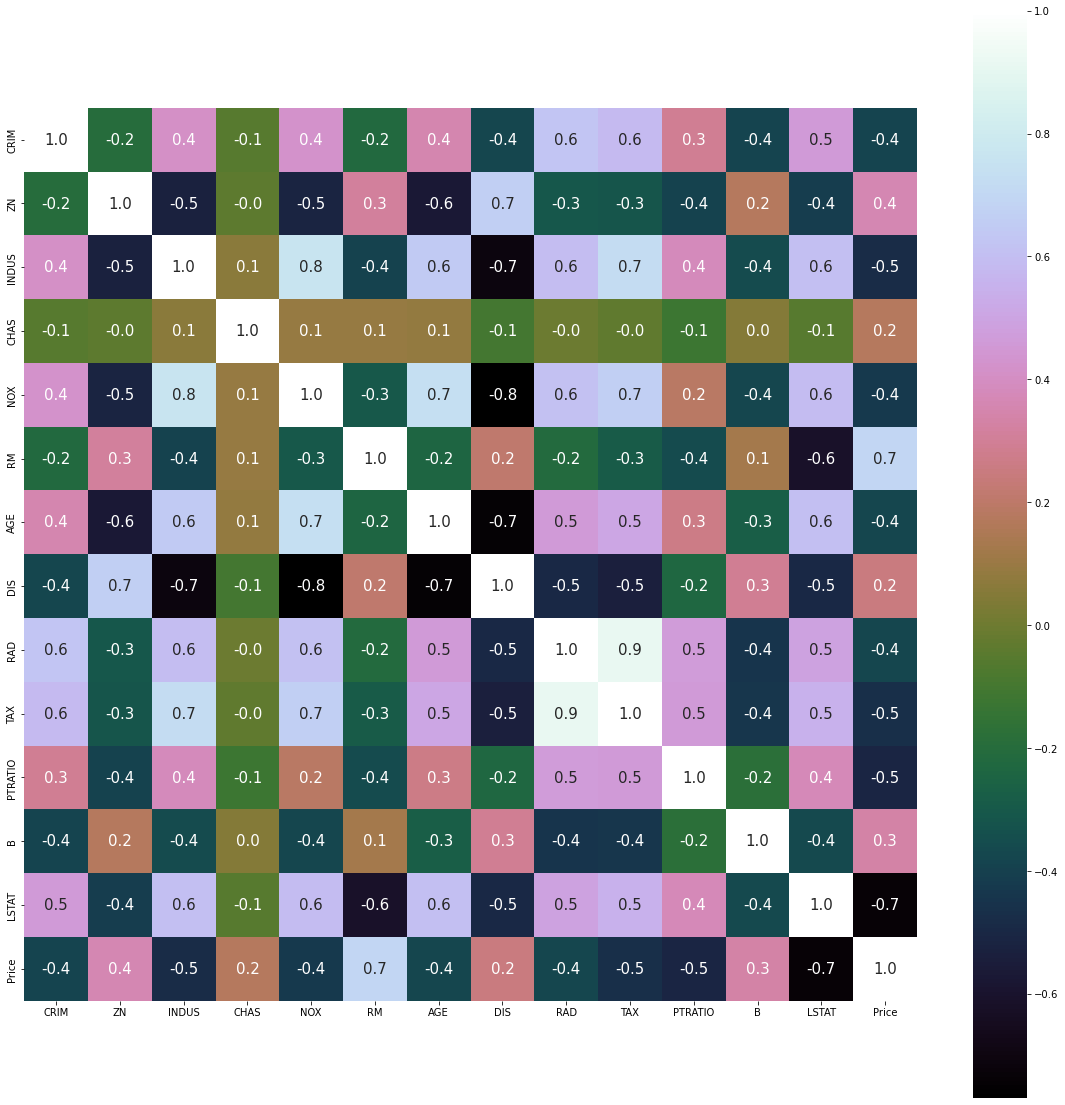

In [21]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='cubehelix')

In [7]:
# Spliting target variable and independent variables
column = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
X = Housing_pricing.loc[:,column]
y = Housing_pricing['Price']

In [8]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

     LSTAT  INDUS     NOX  PTRATIO     RM    TAX     DIS   AGE
477  24.91  18.10  0.6140     20.2  5.304  666.0  2.1007  97.3
15    8.47   8.14  0.5380     21.0  5.834  307.0  4.4986  56.5
332   7.83   6.06  0.4379     16.9  6.031  304.0  6.6407  23.3
423  23.29  18.10  0.6140     20.2  6.103  666.0  2.0218  85.1
19   11.28   8.14  0.5380     21.0  5.727  307.0  3.7965  69.5
..     ...    ...     ...      ...    ...    ...     ...   ...
106  18.66   8.56  0.5200     20.9  5.836  384.0  2.2110  91.9
270  13.00   6.96  0.4640     18.6  5.856  223.0  4.4290  42.1
348   5.99   2.01  0.4350     17.0  6.635  280.0  8.3440  29.7
435  23.27  18.10  0.7400     20.2  6.629  666.0  2.1247  94.6
102  10.63   8.56  0.5200     20.9  6.405  384.0  2.7147  85.4

[404 rows x 8 columns]
     LSTAT  INDUS    NOX  PTRATIO     RM    TAX     DIS    AGE
173   9.04   4.05  0.510     16.6  6.416  296.0  2.6463   84.1
274   3.53   6.41  0.447     17.6  6.758  254.0  4.0776   32.9
491  18.07  27.74  0.609     20

In [9]:
# Create a Linear regressor
lr = linear_model.LinearRegression()
# Train the model using the training sets 
lr.fit(X_train, y_train)


LinearRegression()

In [10]:
# Show the value of y intercept
lr.intercept_

32.31066920361555

In [11]:
#Show the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,LSTAT,-0.564237
1,INDUS,0.002324
2,NOX,-15.357332
3,PTRATIO,-0.920294
4,RM,4.641737
5,TAX,-0.002779
6,DIS,-1.256091
7,AGE,-0.007541


In [13]:
y_predict = lr.predict(X_train)
print(y_predict)

[ 9.67497899 20.11218526 24.26139322 14.48889963 18.81387811 25.99237753
 20.92571384 23.78794365 11.02112226 20.79350557 22.27942512 27.35901486
 32.73726533 17.71113197 35.61081087 14.31997424 20.90808357 28.21866128
 15.5499841  24.60368138 14.48246268 24.41420922 26.44686266 23.31107842
 24.01044195 34.30898986 21.59751385 38.99753869 13.09248246 27.08092037
 18.71678119 21.06653916  9.79597106 22.65090539 22.19811793 30.04130669
 31.29476395 15.95276682 17.45032757 28.22137614 22.99789823 13.22019359
  8.83112898 25.62746004 21.32837852 15.9418577  13.7554259  41.34399219
 18.11297191 16.79782898 26.30505892 24.24980304 22.27797569 21.85253109
 16.09360662 21.56274955 30.3196658  12.1378221  24.4069384  16.10028579
 21.56465399 25.528171   26.62926974 22.12458222 41.76838113 17.56314966
 15.95218407 19.07365335 19.50799105 23.38280531 23.16744032 34.96200712
 20.57749023 21.2725694  26.01564719 31.58182703 33.87459739 28.08664248
  8.13562842  2.57830096 10.24694216 15.59074494 31

In [14]:
# Model Evaluation 
print('R^2:',metrics.r2_score(y_train, y_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict))
print('MSE:',metrics.mean_squared_error(y_train, y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict)))

R^2: 0.7180617917082988
Adjusted R^2: 0.7123516507808718
MAE: 3.5229299314858222
MSE: 24.49293182486547
RMSE: 4.949033423292418


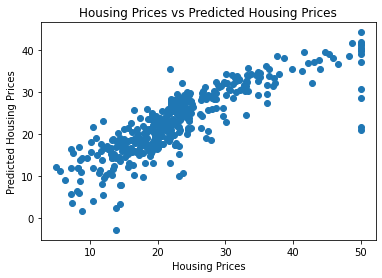

In [15]:
plt.scatter(y_train, y_predict)
plt.xlabel("Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("Housing Prices vs Predicted Housing Prices")
plt.show()

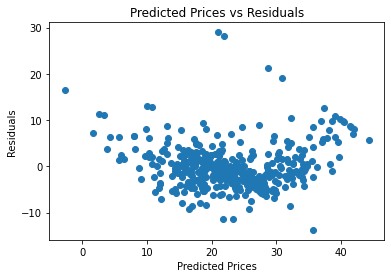

In [17]:
# Checking residuals
plt.scatter(y_predict,y_train-y_predict)
plt.title("Predicted Prices vs Residuals")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.show()

C:\Users\11492\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


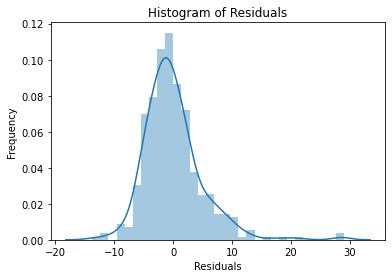

In [18]:
# Checking Normality of errors
sns.distplot(y_train-y_predict)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Predicting Test data with the model
y_test_predict = lr.predict(X_test)

In [27]:
# Model Evaluation
acc_linearregration = metrics.r2_score(y_test, y_test_predict)
print('R^2:', acc_linearregration)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_predict))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:',metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

R^2: 0.6501959101218644
Adjusted R^2: 0.6201052357237452
MAE: 3.291643017040561
MSE: 25.652457275717314
RMSE: 5.064825493115959


In [46]:
# Create a Random Forest Regressor and train the model
reg = RandomForestRegressor()
reg.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
# Model prediction on train data
y_predict = reg.predict(X_train)

In [49]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict))
print('MSE:',metrics.mean_squared_error(y_train, y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict)))

R^2: 0.9774135927379937
Adjusted R^2: 0.9769561465149657
MAE: 0.8868613861386134
MSE: 1.9621580792079198
RMSE: 1.4007705305323637


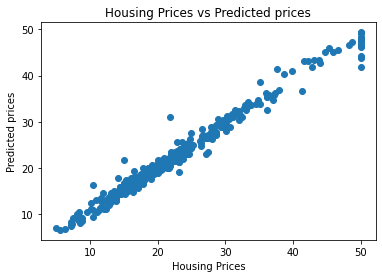

In [51]:

# Plotting the differences between actual prices and predicted prices
plt.scatter(y_train, y_predict)
plt.xlabel("Housing Prices")
plt.ylabel("Predicted prices")
plt.title("Housing Prices vs Predicted prices")
plt.show()

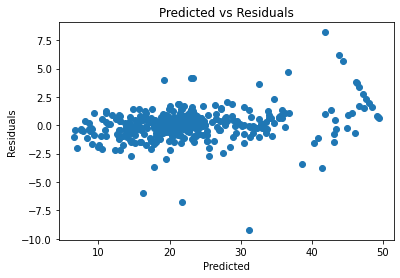

In [53]:
# Checking residuals
plt.scatter(y_predict,y_train-y_predict)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [54]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [55]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8838532234074059
Adjusted R^2: 0.8738621028403011
MAE: 2.023705882352942
MSE: 8.517482529411769
RMSE: 2.918472636399349


In [111]:
import csv

CHousing_pricing = pd.read_csv("C:/Users/11492/Desktop/CS 521/Housing Price Project/C_housing.csv")
print(CHousing_pricing)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [112]:
CHousing_pricing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [113]:
# Correlation between features
corr = CHousing_pricing.corr()
corr.shape

(9, 9)

<AxesSubplot:>

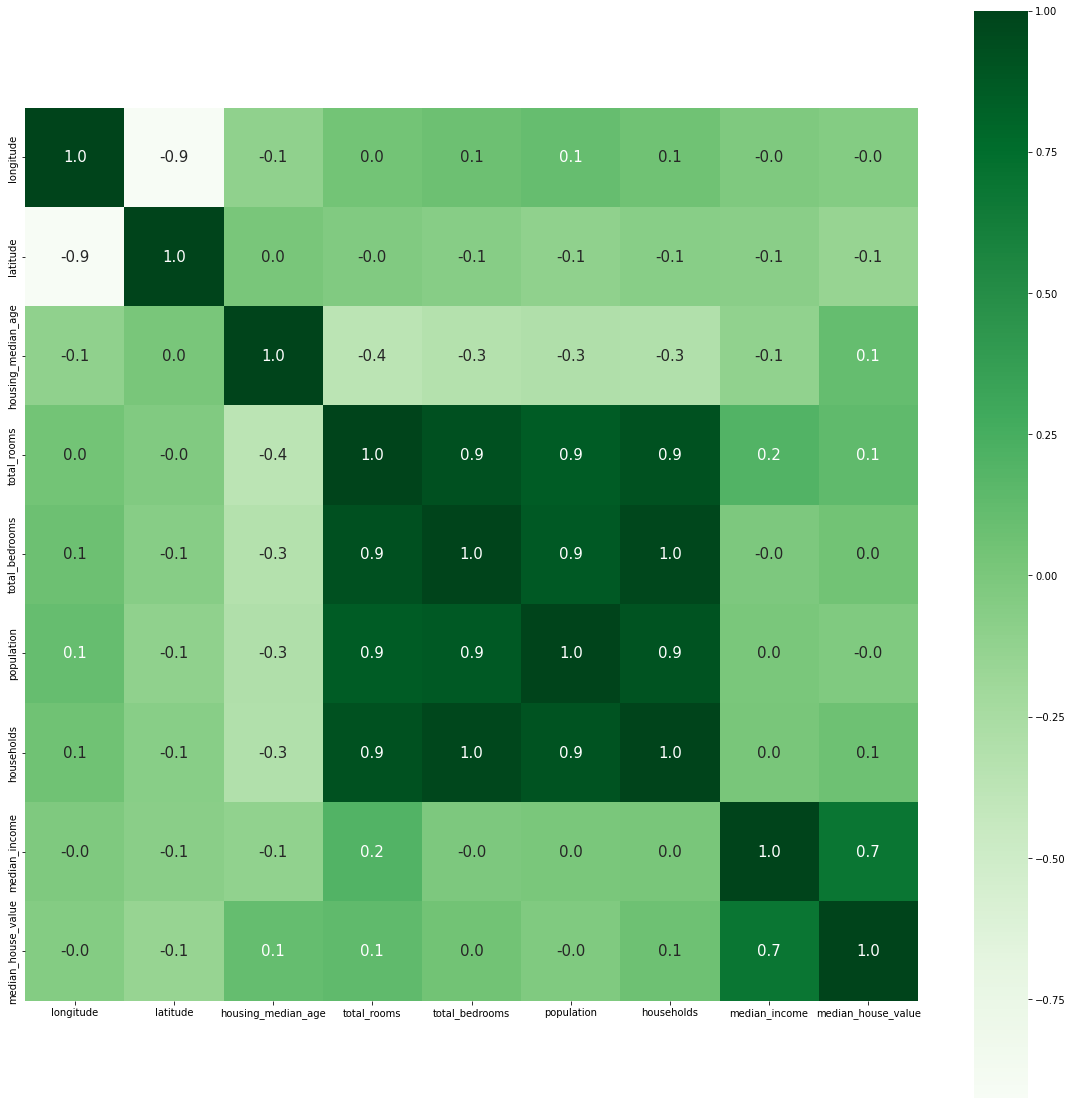

In [114]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [124]:
# Spliting target variable and independent variables
HP = CHousing_pricing.drop(['ocean_proximity'], axis = 1)
HP = HP.fillna(0)
X = HP.drop(['median_house_value'], axis = 1)
y = HP['median_house_value']

In [125]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  
1419

In [126]:
# Create a Linear regressor
lg = linear_model.LinearRegression()
# Train the model using the training sets 
lg.fit(X_train, y_train)

LinearRegression()

In [127]:
# Show the value of y intercept
lg.intercept_

-3578224.234817919

In [128]:
#Show the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lg.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,longitude,-42632.391717
1,latitude,-42450.071863
2,housing_median_age,1182.809649
3,total_rooms,-8.187977
4,total_bedrooms,116.260128
5,population,-38.492213
6,households,46.342572
7,median_income,40538.404387


In [129]:
y_predict = lg.predict(X_train)
print(y_predict)

[181313.23430336 286451.78145112 263328.07605751 ... 191338.67423603
 273178.05856515 278432.75202799]


In [130]:
# Model Evaluation 
print('R^2:',metrics.r2_score(y_train, y_predict))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_predict))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_predict))
print('MSE:',metrics.mean_squared_error(y_train, y_predict))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_predict)))

R^2: 0.640094792430529
Adjusted R^2: 0.6399203246573631
MAE: 50626.79448983832
MSE: 4811134397.884201
RMSE: 69362.34135238084


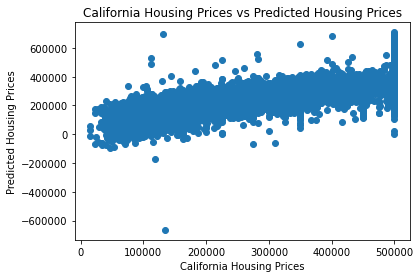

In [131]:
plt.scatter(y_train, y_predict)
plt.xlabel("California Housing Prices")
plt.ylabel("Predicted Housing Prices")
plt.title("California Housing Prices vs Predicted Housing Prices")
plt.show()

In [132]:
# Predicting Test data with the model
y_test_pred = lg.predict(X_test)

In [133]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5995139220750842
Adjusted R^2: 0.598736090411234
MAE: 52615.05867896131
MSE: 5248005521.732942
RMSE: 72443.11921592652
